### 참고자료

https://tykimos.github.io/2017/08/17/Text_Input_Binary_Classification_Model_Recipe/

https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/

https://github.com/rickiepark/deep-learning-with-python-notebooks/blob/master/3.4-classifying-movie-reviews.ipynb

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://woosa7.github.io/DL00/

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

max_features = 20000
text_max_words = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

### 데이터셋 분리

In [3]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

해당 데이터셋에는 학습 데이터 25000개와 평가 데이터 25000개의 데이터 샘플이 존재한다. 이를 학습을 위해 20000개의 학습 데이터와 5000개의 평가 데이터로 분류한다.

### 데이터셋 전처리

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

IMDB데이터 셋의 문장 길이가 각각 다르므로, 학습을 위해서 이를 모두 동일한 길이로 설정한다.

### 모델 구성

In [5]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


모델을 구성하고, 이를 출력했다. embedding -> LSTM -> DENSE 순으로 레이어가 구성되어 있으며, 임베딩한 데이터를 지난 수업에서 배운 RNN의 방식중 하나인 LSTM으로 학습하고, 이를 sigmoid(0과 1로 값을 결정하여 알려주는 방식)으로 나타낸다.

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

제대로된 학습을 위해 loss_function과 optimizer를 설정한다. 

loss_function의 binary_crossentropy는 log형식의 cost function이라는데, 일반적으로 바이너리 값일 경우 사용하는 것 같다. 결과값이 3개 이상을 원할 경우 categorical_crossentropy를 사용한다. 변수 예측을 위해 사용한다.

optimizer로 사용하는 adam은 0으로 편향되는 결과값을 막기 위해 사용한다.

metrics에서 accuracy는 학습 목표를 말한다. 정확도를 기준으로 학습을 진행한다.

### 모델 학습

In [7]:
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 65s 3ms/step - loss: 0.4151 - acc: 0.8056 - val_loss: 0.3863 - val_acc: 0.8320
Epoch 2/25
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2291 - acc: 0.9140 - val_loss: 0.3242 - val_acc: 0.8796
Epoch 3/25
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1486 - acc: 0.9460 - val_loss: 0.3836 - val_acc: 0.8516
Epoch 4/25
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1038 - acc: 0.9641 - val_loss: 0.4605 - val_acc: 0.8464
Epoch 5/25
20000/20000 [==============================] - 63s 3ms/step - loss: 0.0748 - acc: 0.9742 - val_loss: 0.5281 - val_acc: 0.8590
Epoch 6/25
20000/20000 [==============================] - 63s 3ms/step - loss: 0.0687 - acc: 0.9768 - val_loss: 0.5257 - val_acc: 0.8566
Epoch 7/25
20000/20000 [==============================] - 63s 3ms/step - loss: 0.

학습을 진행한다. 요구조건으로 epochs를 최소 25회 이상 진행하라고 하였으므로, 이를 25로 변경하여 학습을 진행하였다.

### 시각화

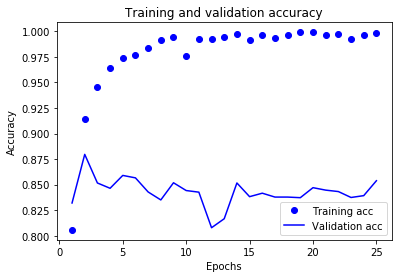

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 평가

In [9]:
results = model.evaluate(x_test, y_test, batch_size=64)
print(results)

25000/25000 [==============================] - 15s 611us/step
[1.003388913269043, 0.844559999961853]


In [10]:
model.predict(x_val)

array([[9.9947840e-01],
       [2.0980835e-05],
       [2.9952675e-02],
       ...,
       [2.4110079e-05],
       [9.9999726e-01],
       [9.9256134e-01]], dtype=float32)

결과 값을 확인하고, 실제 x_val이라는 우리가 평가에 사용한 데이터 셋의 예측 결과가 어떻게 나왔는지에 대해 확인하였다.